In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import pickle

plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
df = pd.read_csv('C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/time_series_dataframe.csv',parse_dates=['Date'])

In [3]:
# Prepare data
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

In [4]:
### column must be renamed
df.rename(columns={'LF_Part':'target_index'},inplace=True)

In [5]:
target_index = 'target_index'

In [6]:
### title must be renamed
title='Labor Force Participation'


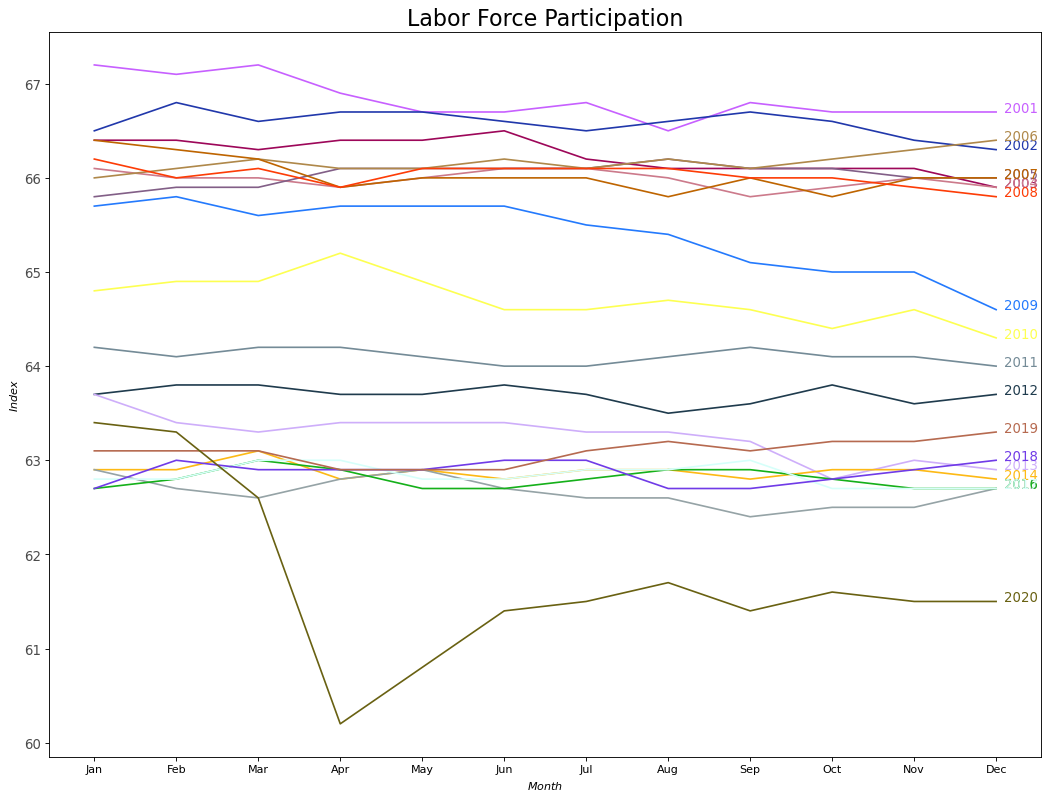

In [7]:
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', target_index, data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, target_index][-1:].values[0], y, fontsize=12, color=mycolors[i])
        
# Decoration
plt.gca().set(ylabel='$Index$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title(title, fontsize=20)
plt.show()   
    

    

In [8]:
df.head()

,Unnamed: 0,Date,CS_HPA_20_cities,CS_HP,UNEMPLOY,target_index,Y10_CMT,Y30_fixed_mortgage_rate,year,month
0,0,2000-01-01,100.589697,100.552,4.5,67.3,6.661000,8.2100,2000,Jan
1,1,2000-02-01,101.692479,101.339,4.4,67.3,6.519500,8.3250,2000,Feb
2,2,2000-03-01,102.783829,102.127,4.3,67.3,6.256522,8.2400,2000,Mar
3,3,2000-04-01,103.996444,102.922,3.7,67.3,5.990526,8.1525,2000,Apr
4,4,2000-05-01,105.252818,103.677,3.8,67.1,6.440455,8.5150,2000,May


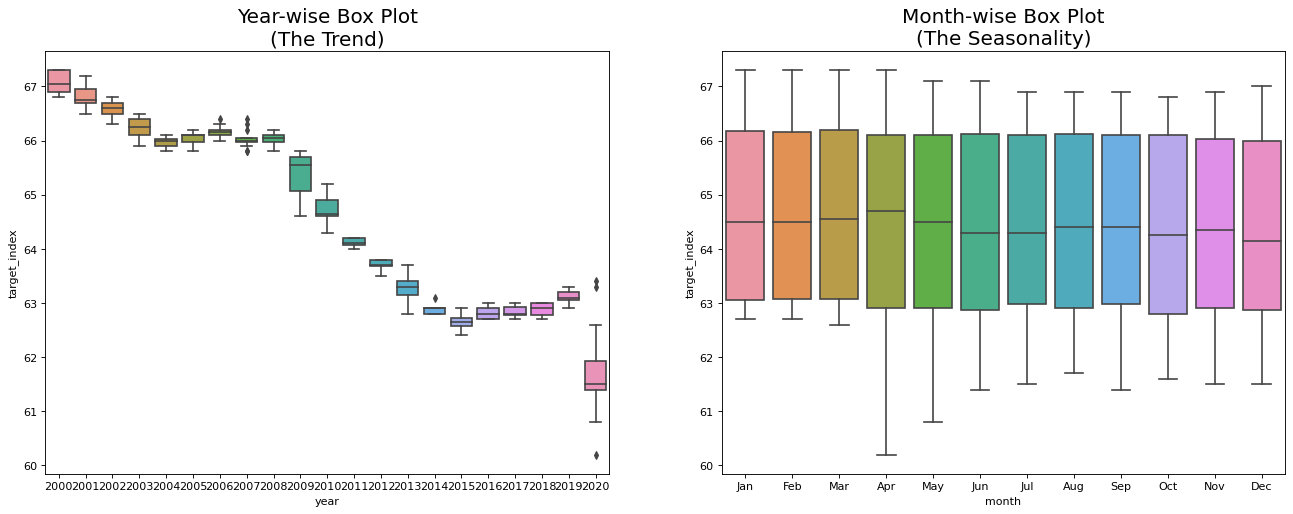

In [9]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y=target_index, data=df, ax=axes[0])
sns.boxplot(x='month', y=target_index, data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse



In [11]:
df = pd.read_csv('C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/time_series_dataframe.csv', parse_dates=['Date'], index_col='Date')

In [12]:
### column must be renamed
df.rename(columns={'LF_Part':'target_index'},inplace=True)

In [13]:
df.head()

,Unnamed: 0,CS_HPA_20_cities,CS_HP,UNEMPLOY,target_index,Y10_CMT,Y30_fixed_mortgage_rate
Date,,,,,,,
2000-01-01,0,100.589697,100.552,4.5,67.3,6.661000,8.2100
2000-02-01,1,101.692479,101.339,4.4,67.3,6.519500,8.3250
2000-03-01,2,102.783829,102.127,4.3,67.3,6.256522,8.2400
2000-04-01,3,103.996444,102.922,3.7,67.3,5.990526,8.1525
2000-05-01,4,105.252818,103.677,3.8,67.1,6.440455,8.5150


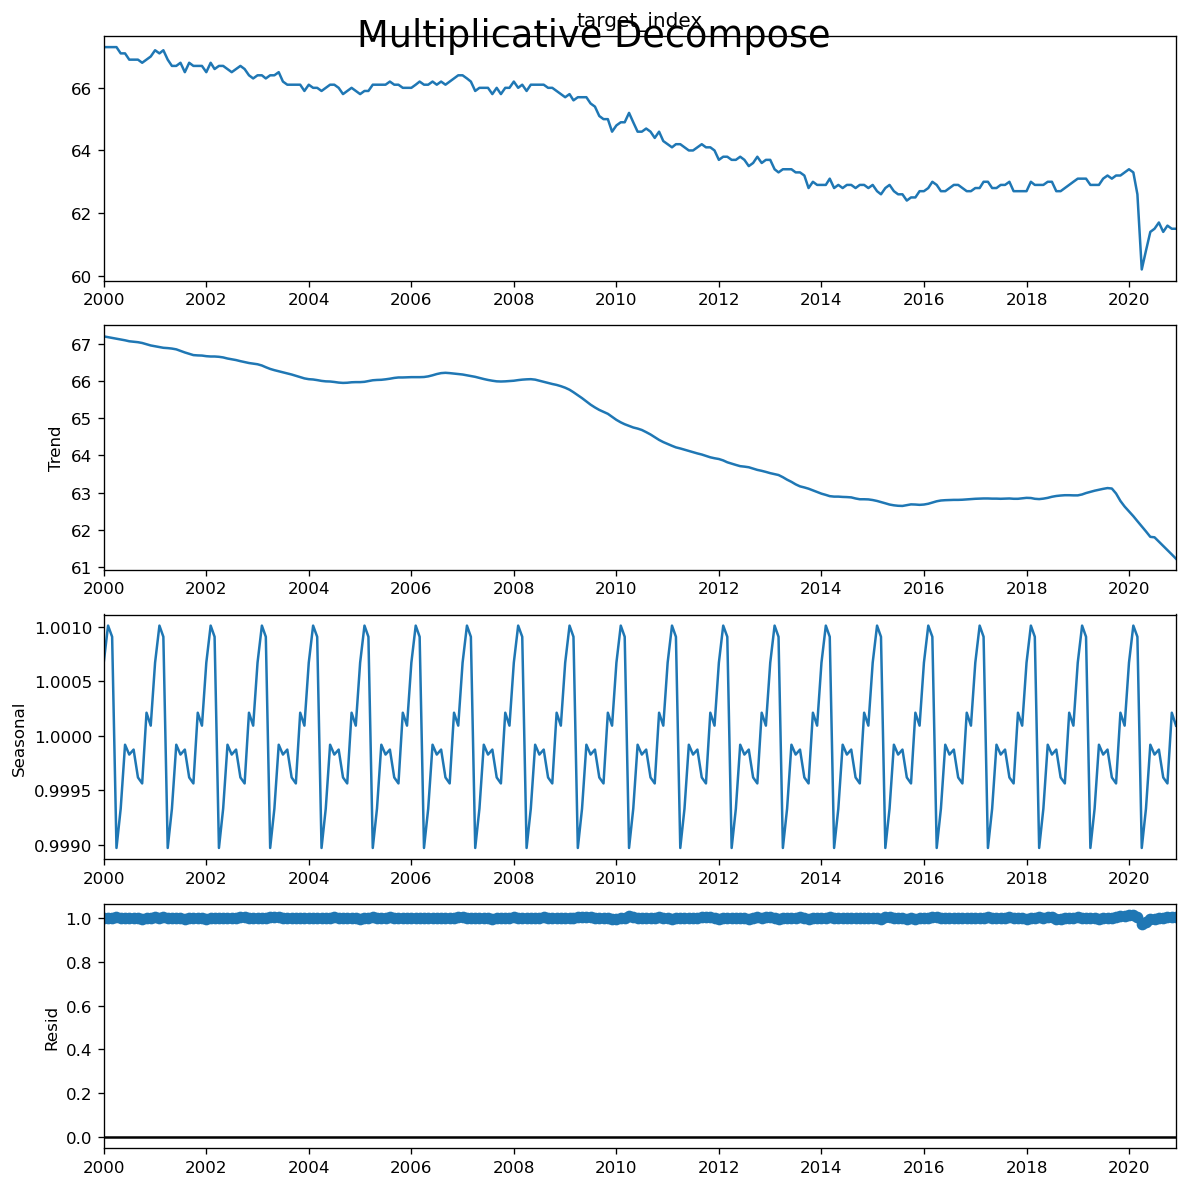

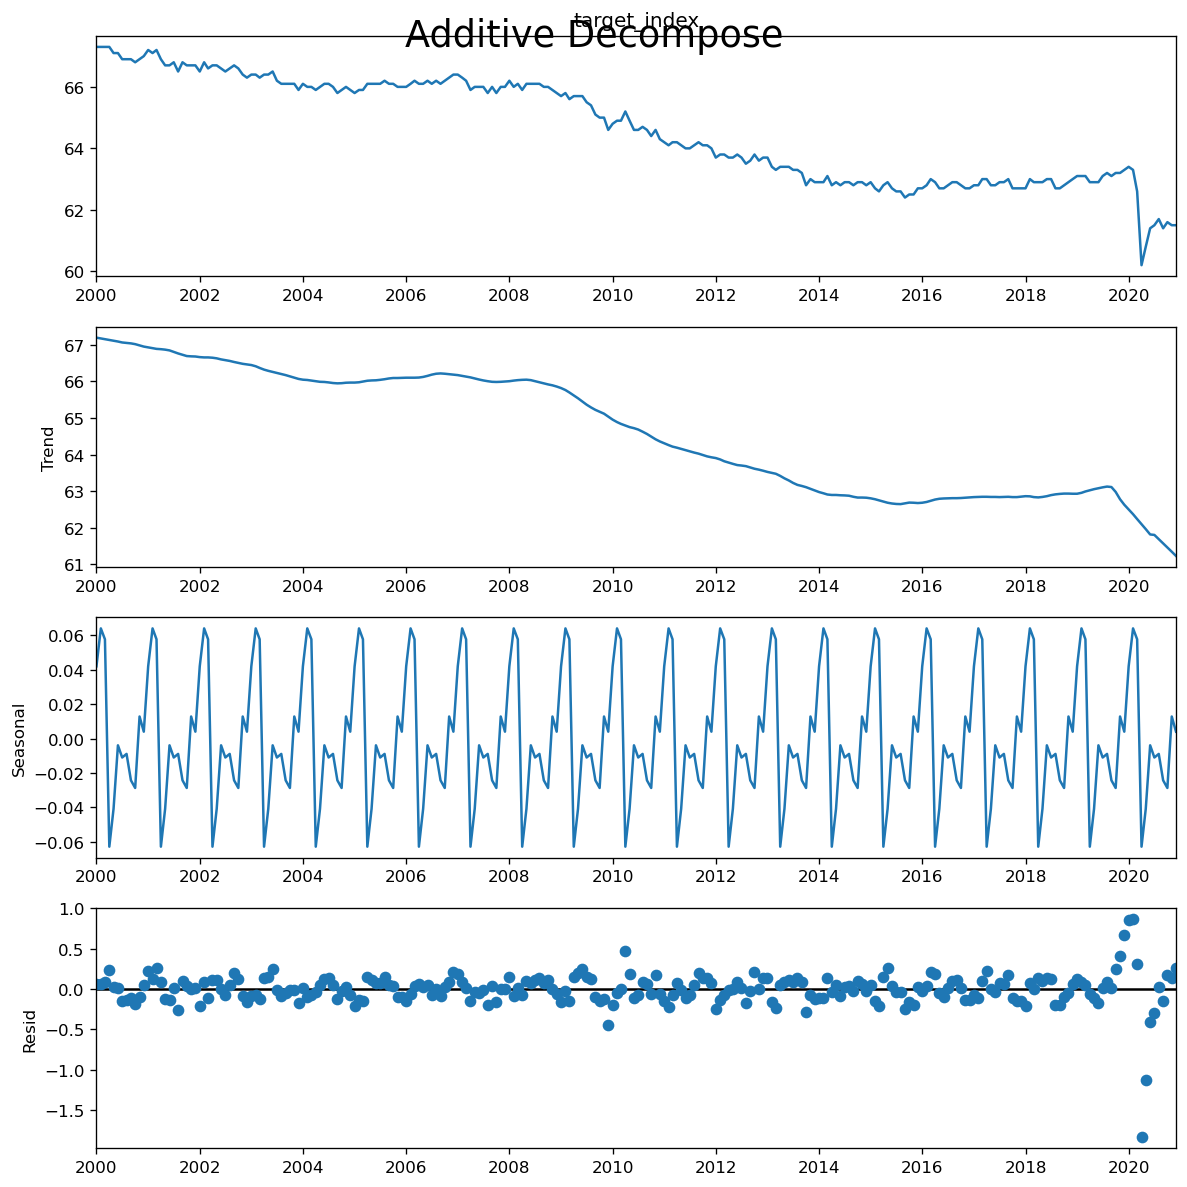

In [14]:


# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['target_index'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['target_index'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [15]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Date,,,,
2000-01-01,1.000670,67.193988,1.000908,67.3
2000-02-01,1.001009,67.172892,1.000883,67.3
2000-03-01,1.000907,67.151797,1.001299,67.3
2000-04-01,0.998974,67.130701,1.003552,67.3
2000-05-01,0.999333,67.109606,1.000524,67.1


In [16]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df.index.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.index.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.8447622367479495
p-value: 0.9923254105944419
Critial Values:
   1%, -3.458010773719797
Critial Values:
   5%, -2.8737103617125186
Critial Values:
   10%, -2.5732559963936206

KPSS Statistic: 1.589122
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Jonathan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Jonathan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


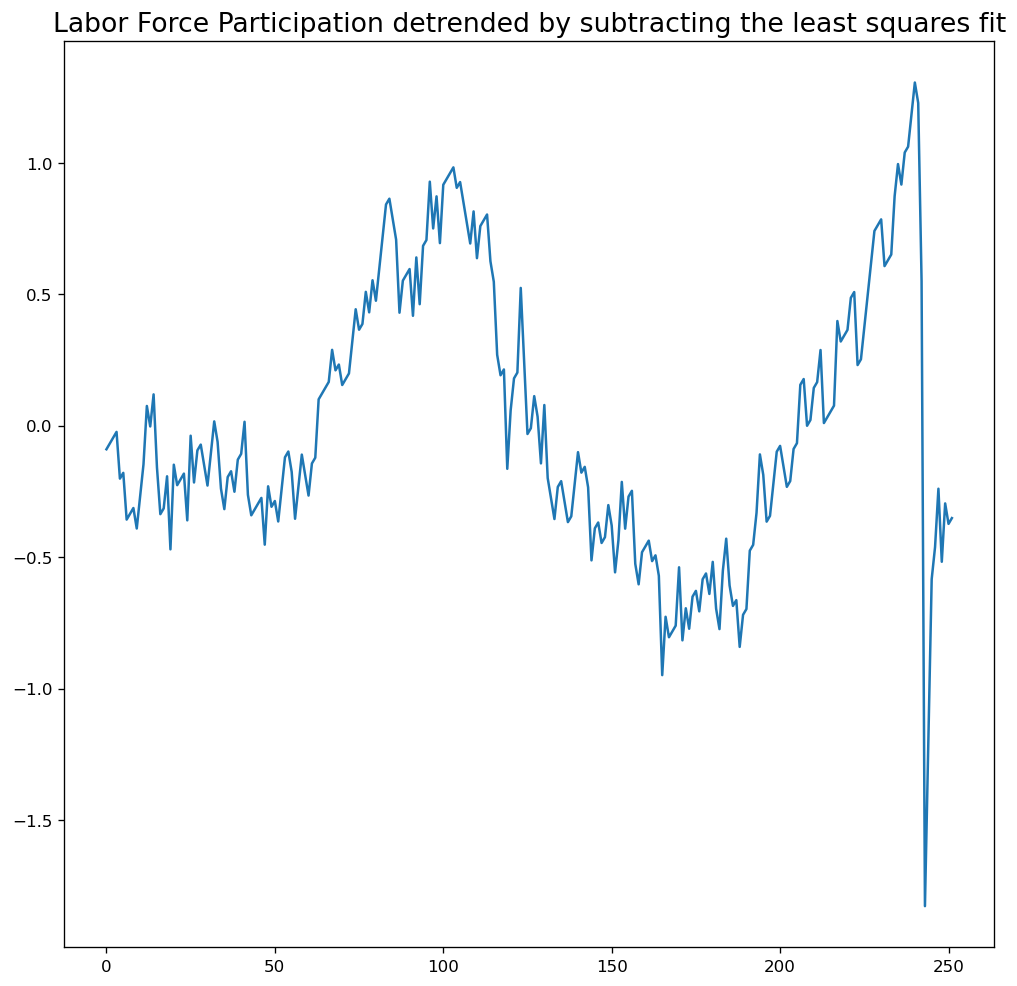

In [17]:
from scipy import signal

detrended = signal.detrend(df.target_index.values)
plt.plot(detrended)
plt.title(title + ' ' + 'detrended by subtracting the least squares fit', fontsize=16)
plt.show()

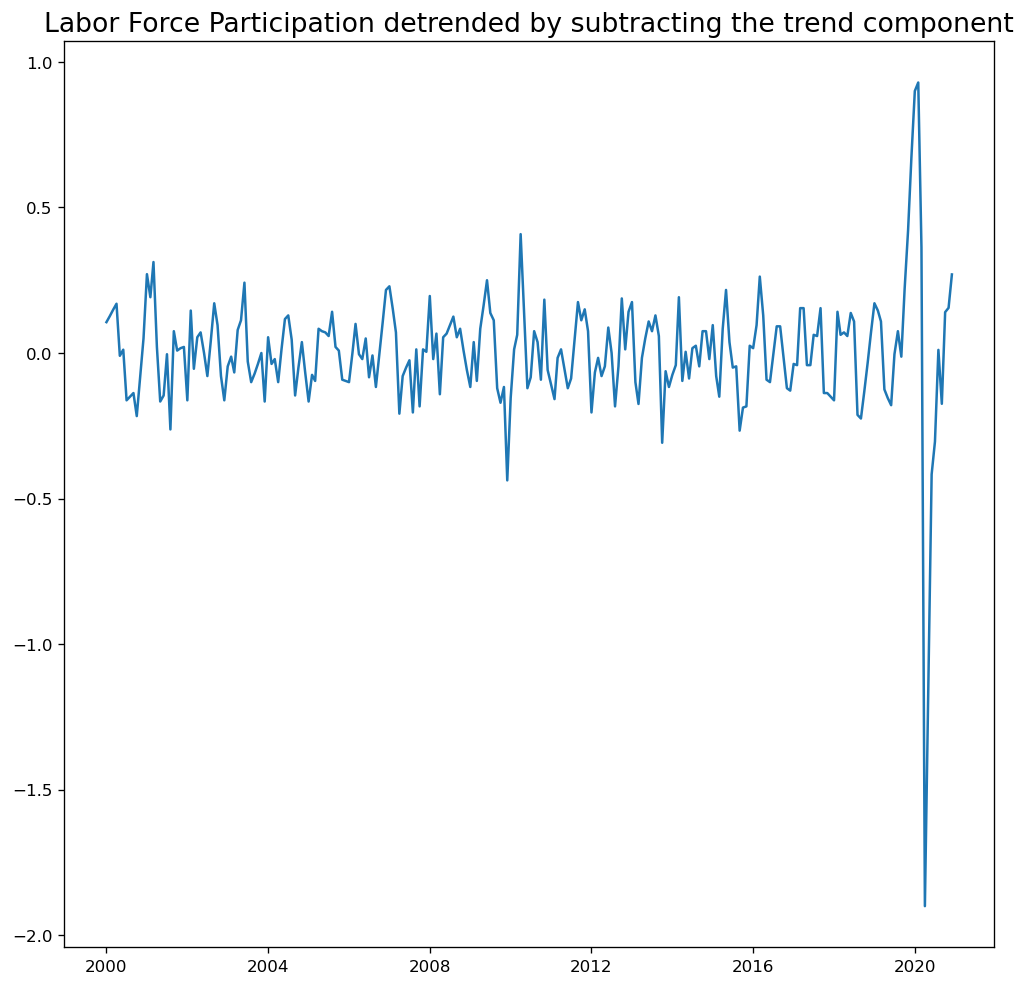

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose


result_mul = seasonal_decompose(df[target_index], model='multiplicative', extrapolate_trend='freq')
detrended = df.target_index.values - result_mul.trend
plt.plot(detrended)


plt.title(title +' '+ 'detrended by subtracting the trend component', fontsize=16)
plt.show()

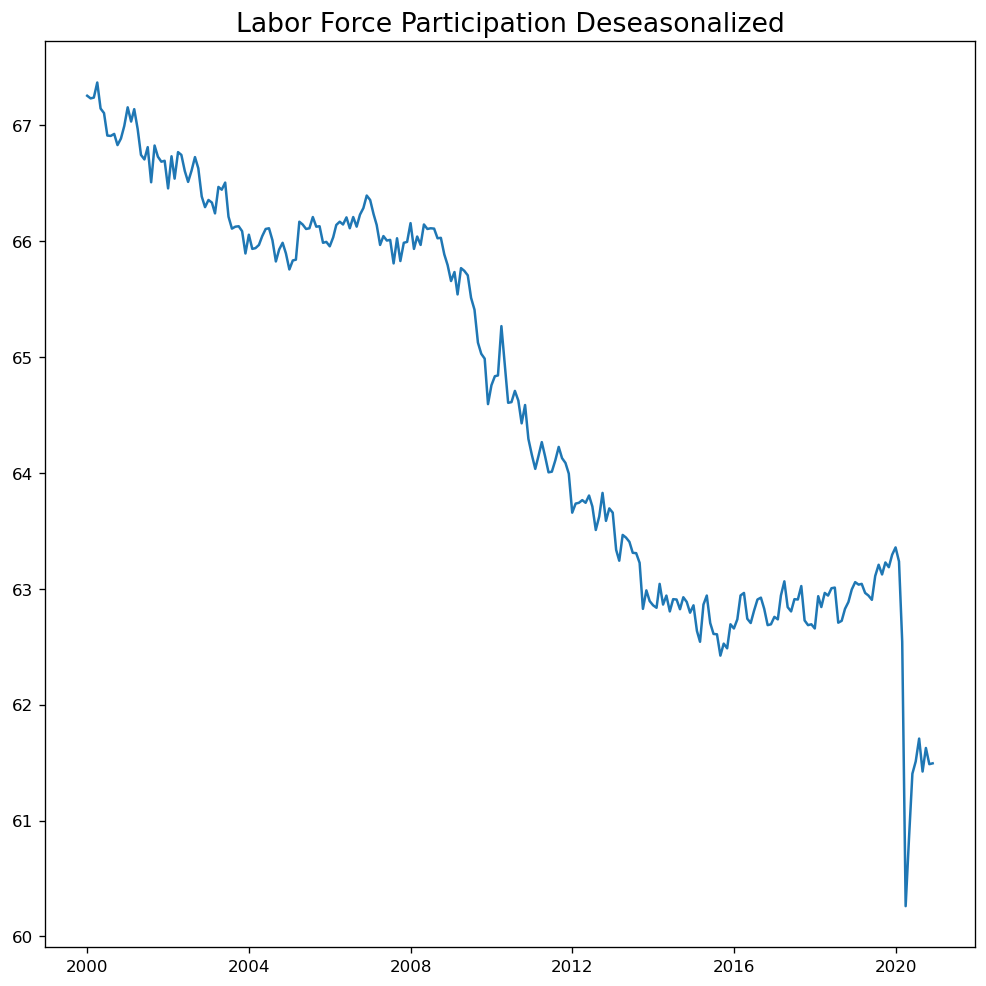

In [19]:
# Subtracting the Trend Component.

# Time Series Decomposition
result_mul = seasonal_decompose(df[target_index], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.target_index.values / result_mul.seasonal

# Plot 
plt.plot(deseasonalized)
plt.title(title + ' Deseasonalized', fontsize=16)
plt.plot()
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

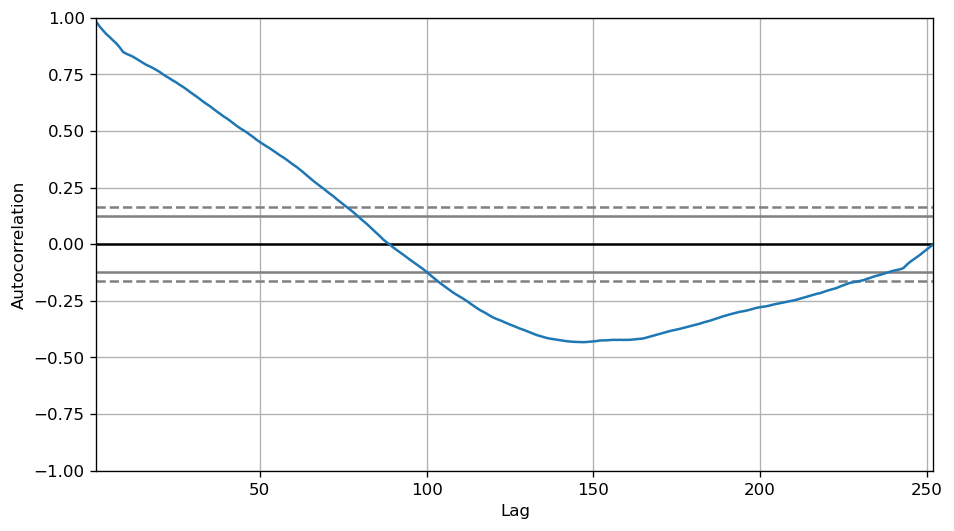

In [20]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.target_index.tolist())

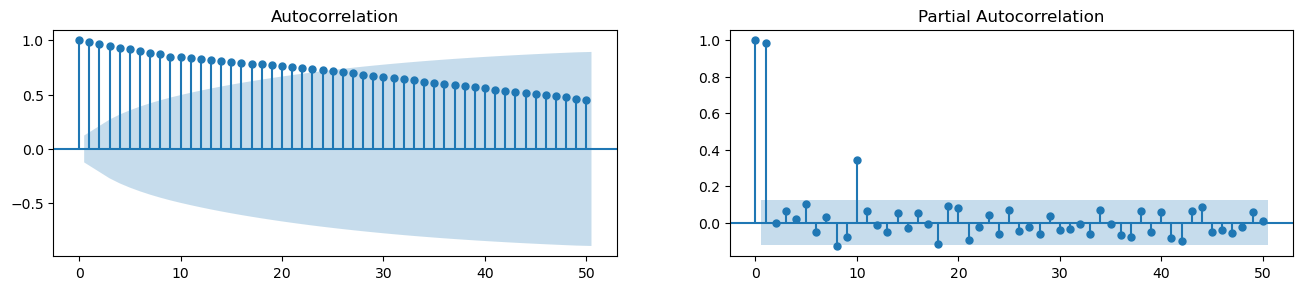

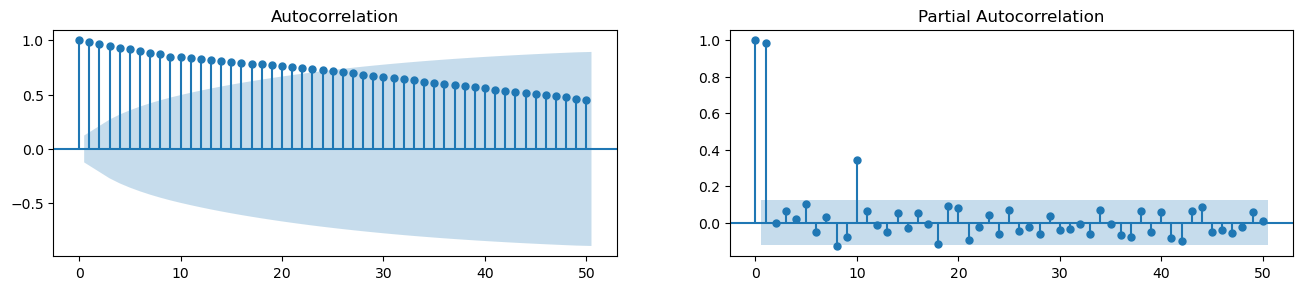

In [21]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.target_index.tolist(), lags=50, ax=axes[0])
plot_pacf(df.target_index.tolist(), lags=50, ax=axes[1])

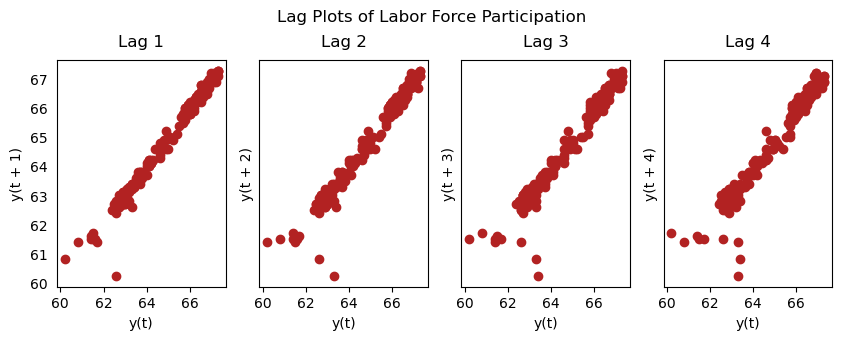

In [22]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})


# Plot

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df.target_index, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of ' + title, y=1.05)    
plt.show()


In [23]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(df.target_index, m=2, r=0.2*np.std(df.target_index)))     # 0.651

0.16382989660426528


In [24]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(df.target_index, m=2, r=0.2*np.std(df.target_index))) 

0.11387845472312881


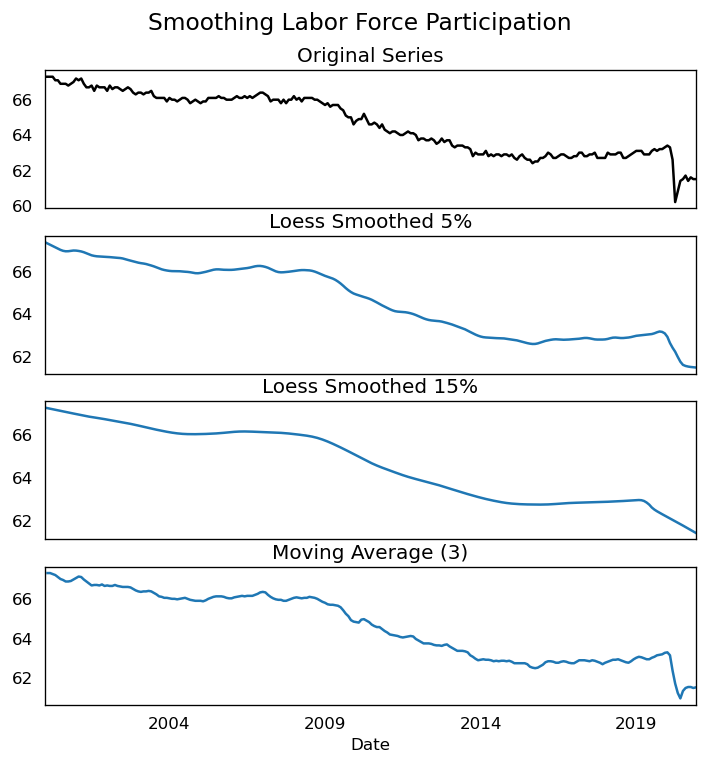

In [25]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# 1. Moving Average
df_ma = df.target_index.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df.target_index, np.arange(len(df.target_index)), frac=0.05)[:, 1], index=df.index, columns=['target_index'])
df_loess_15 = pd.DataFrame(lowess(df.target_index, np.arange(len(df.target_index)), frac=0.15)[:, 1], index=df.index, columns=['target_index'])

                          
# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df[target_index].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5[target_index].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15[target_index].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('Smoothing '+ title, y=0.95, fontsize=14)
plt.show()


In [26]:
###Modeling

In [27]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.target_index.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.263007
p-value: 0.930583


In [28]:
df = pd.read_csv('C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/time_series_dataframe.csv',index_col=False)

In [29]:
### Column must be renamed
df.rename(columns={'LF_Part':'target_index'},inplace=True)

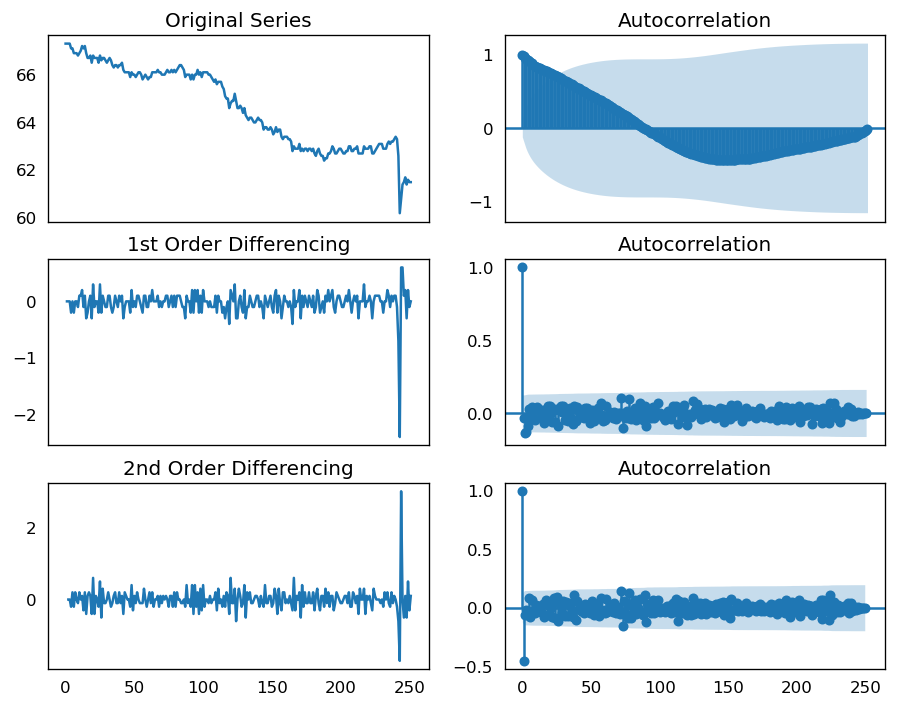

In [30]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.target_index); axes[0, 0].set_title('Original Series')
plot_acf(df.target_index, ax=axes[0, 1], lags=df.target_index.shape[0] - 1)

# 1st Differencing
axes[1, 0].plot(df.target_index.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.target_index.diff().dropna(), ax=axes[1, 1], lags=df.target_index.shape[0] - 2)

# 2nd Differencing
axes[2, 0].plot(df.target_index.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.target_index.diff().diff().dropna(), ax=axes[2, 1], lags=df.target_index.shape[0] - 3)

plt.show()

In [31]:
from pmdarima.arima.utils import ndiffs
y = df.target_index

## Adf Test
print(ndiffs(y, test='adf'))  # 2

# KPSS test
print(ndiffs(y, test='kpss'))  # 0

# PP test:
print(ndiffs(y, test='pp'))  # 2

1
1
1


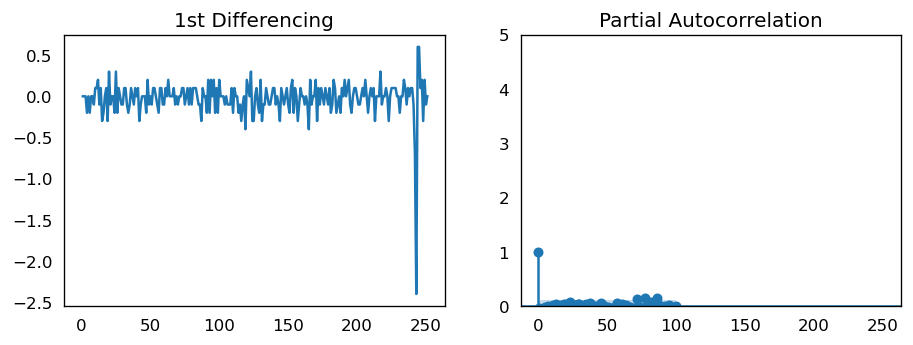

In [32]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.target_index.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.target_index.diff().dropna(), ax=axes[1],lags=100)

plt.show()

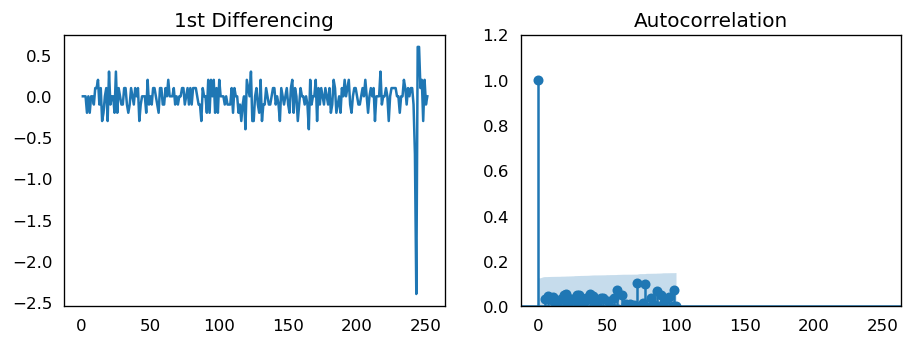

In [33]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.target_index.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.target_index.diff().dropna(), ax=axes[1],lags=100)

plt.show()

In [34]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df.target_index, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-62.909, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-56.117, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-54.393, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-54.503, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-55.225, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-64.101, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-60.382, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-63.043, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-62.749, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-63.569, Time=0.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-61.644, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-57.871, Time=0.06 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 2.030 seconds
                               SARIMAX 

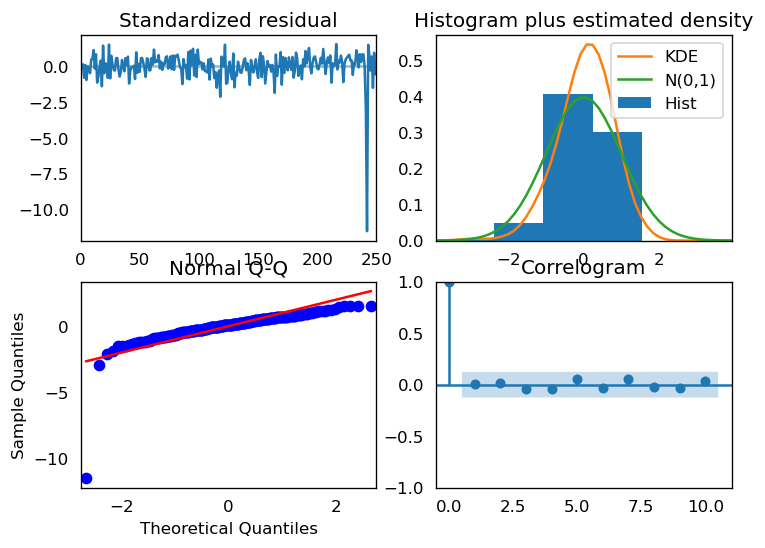

In [35]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

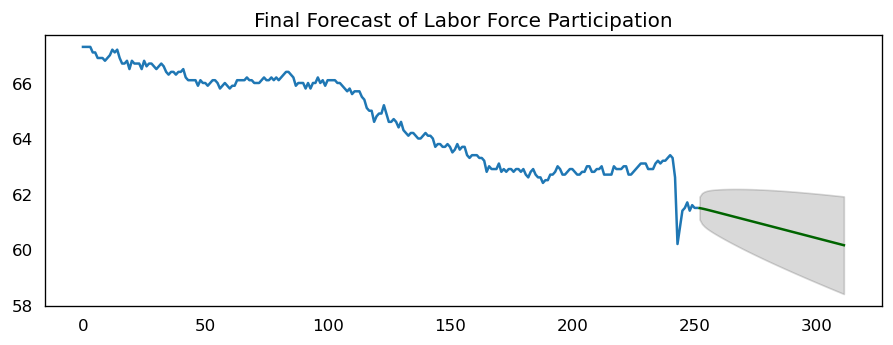

In [36]:
n_periods = 60
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.target_index), len(df.target_index)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.target_index)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of " + title)
plt.show()

In [37]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.target_index[:200]
test = df.target_index[200:]

C:\Users\Jonathan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jonathan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

                             ARIMA Model Results                              
Dep. Variable:        D2.target_index   No. Observations:                  198
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 112.837
Method:                       css-mle   S.D. of innovations              0.135
Date:                Fri, 03 Sep 2021   AIC                           -215.674
Time:                        12:30:46   BIC                           -199.233
Sample:                             2   HQIC                          -209.019
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.451e-05      0.000     -0.114      0.910      -0.000       0.000
ar.L1.D2.target_index    -0.2542      0.071     -3.570      0.000      -0.394      -0.115
ar.L2.D2

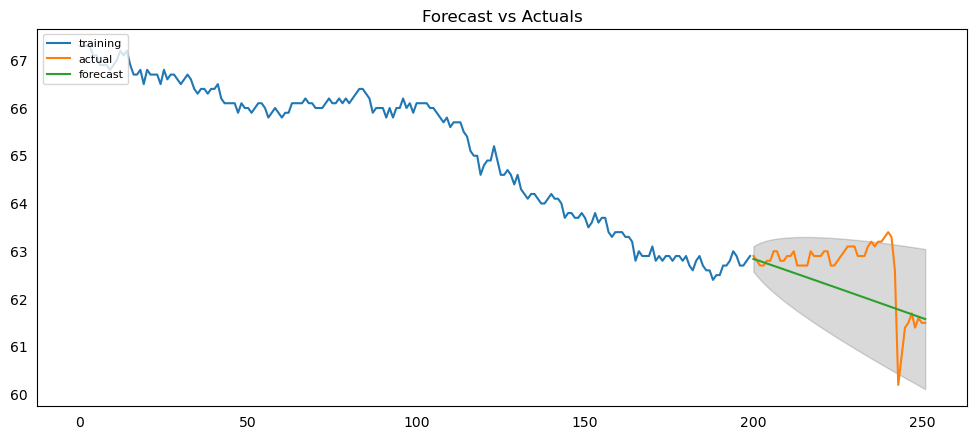

In [38]:
# Build Model
model = ARIMA(train, order=(2, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(52, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()